In [33]:
#importaciones
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import _converter
%matplotlib inline 
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
import datetime
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
%matplotlib inline

In [34]:
df_edu = pd.read_csv("../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
df_gen_edad = pd.read_csv("../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", parse_dates=['fechanacimiento'])
df_vistas = pd.read_csv("../datos_navent_fiuba/fiuba_3_vistas.csv", parse_dates=['timestamp'])
df_postulaciones = pd.read_csv("../datos_navent_fiuba/fiuba_4_postulaciones.csv", parse_dates=['fechapostulacion'])

df_vistas["date"] = df_vistas["timestamp"].dt.date
df_postulaciones["date"] = df_vistas["timestamp"].dt.date
date_ini = datetime.date(year=2018,month=2,day=23)
date_fin = datetime.date(year=2018,month=2,day=28)
df_periodo_postulaciones = df_postulaciones[df_postulaciones["date"] >= date_ini]
df_periodo_vistas = df_vistas[(df_vistas["date"] >= date_ini) & (df_vistas["date"] <= date_fin)]




In [35]:
orden_nombre = {
    "Doctorado":0,
    "Master":1,
    "Posgrado":2,
    "Universitario":3,
    "Terciario/Técnico":4,
    "Secundario":5,
    "Otro":6
}

orden_estado = {
    "Graduado":0,
    "En Curso":1,
    "Abandonado":2,
}

df_edu["prioridad_nom"] = df_edu["nombre"].apply(lambda nombre: orden_nombre.get(nombre))
df_edu["prioridad_est"] = df_edu["estado"].apply(lambda estado: orden_estado.get(estado))

df_edu.sort_values(by= ["idpostulante","prioridad_est","prioridad_nom"],inplace= True)

df_edu_unicos_max = df_edu.drop_duplicates(subset = "idpostulante",keep= "first")


#df_sum_post = df_periodo_postulaciones.groupby("idpostulante")["postulacion"].count()

#df_sum_vista =  df_periodo_vistas.groupby("idpostulante")["vista"].sum().reset_index()

#df_edu_post = df_edu_unicos_max.merge(df_sum_post, on="idpostulante" ,how="inner").groupby("nombre")["postulacion",].sum().reset_index()

#df_edu_vista = df_edu_unicos_max.merge(df_sum_vista, on="idpostulante" ,how="left").groupby("nombre")["vista",].sum().reset_index()



In [36]:
df_periodo_vistas.drop_duplicates(subset = "idpostulante",keep= "first").shape

(85497, 4)

In [37]:
df_sum_vistas= df_periodo_vistas.groupby("idpostulante")["idAviso",].count().reset_index()
df_sum_vistas.rename(columns= {"idAviso" : "Vistas"}, inplace=True)

In [38]:
df_periodo_postulaciones.drop_duplicates(subset = "idpostulante",keep= "first").shape

(54547, 4)

In [39]:
print "vistas",df_periodo_vistas.shape
print "postulaciones",df_periodo_postulaciones.shape

vistas (921074, 4)
postulaciones (961897, 4)


In [40]:
df_sum_post= df_periodo_postulaciones.groupby("idpostulante")["idaviso",].count().reset_index()
df_sum_post.rename(columns= {"idaviso" : "Postulaciones"}, inplace=True)

In [41]:
#ruzo las vistas
df_edu_vistas = df_edu_unicos_max.join(df_sum_vistas.set_index('idpostulante'),on="idpostulante", how= "inner")

In [42]:
df_edu_vistas


,idpostulante,nombre,estado,prioridad_nom,prioridad_est,Vistas
113675,0zB026d,Terciario/Técnico,Graduado,4,0,6
113857,0zB03O9,Secundario,Graduado,5,0,45
111181,0zB0YGv,Otro,En Curso,6,1,2
111191,0zB0xL1,Universitario,En Curso,3,1,2
121371,0zB11wr,Universitario,Graduado,3,0,1
121396,0zB16Dr,Secundario,Graduado,5,0,5
121139,0zB1Bev,Secundario,Graduado,5,0,7
121559,0zB1XB1,Secundario,Graduado,5,0,16
121419,0zB1YOY,Secundario,Graduado,5,0,8
121350,0zB1oA1,Universitario,Graduado,3,0,7


In [43]:
#cruzo las postulaciones 
df_edu_vistas_post = df_edu_vistas.join(df_sum_post.set_index('idpostulante'),on="idpostulante", how= "inner")

In [44]:
df_edu_vistas_post

,idpostulante,nombre,estado,prioridad_nom,prioridad_est,Vistas,Postulaciones
113675,0zB026d,Terciario/Técnico,Graduado,4,0,6,3
111181,0zB0YGv,Otro,En Curso,6,1,2,51
104996,0zB4EoY,Secundario,Graduado,5,0,5,55
104934,0zB4Lbd,Secundario,Graduado,5,0,38,93
102176,0zB4dN9,Terciario/Técnico,En Curso,4,1,4,1
105275,0zB4jvq,Universitario,Graduado,3,0,4,2
104793,0zB4wYr,Secundario,Graduado,5,0,19,18
105186,0zB4xvv,Secundario,Graduado,5,0,51,25
122405,0zB60YY,Secundario,Graduado,5,0,13,7
122760,0zB68qq,Secundario,Graduado,5,0,18,6


hay muchos maaas de postulaciones que vistas

In [45]:
df_edu_vistas_post = df_edu_vistas_post.groupby("nombre")["Vistas","Postulaciones"].sum()
df_edu_vistas_post

,Vistas,Postulaciones
nombre,,
Doctorado,138,334
Master,2214,4930
Otro,3828,6727
Posgrado,5007,11206
Secundario,108580,202671
Terciario/Técnico,34266,62005
Universitario,78699,152373


In [46]:
total_vistas = float(df_edu_vistas_post["Vistas"].sum())
total_postulaciones = float(df_edu_vistas_post["Postulaciones"].sum())

In [47]:
df_edu_vistas_post["%Vistas"] = df_edu_vistas_post["Vistas"].apply(lambda x: round(x/total_vistas*100))
df_edu_vistas_post["%Postulaciones"] = df_edu_vistas_post["Postulaciones"].apply(lambda x: round(x/total_postulaciones*100))

df_edu_vistas_post= df_edu_vistas_post.reset_index()

df_edu_vistas_post["prioridad"]= df_edu_vistas_post["nombre"].apply(lambda nom: orden_nombre.get(nom))
df_edu_vistas_post = df_edu_vistas_post.sort_values(by= "prioridad",ascending= False)
df_edu_vistas_post = df_edu_vistas_post.set_index(keys="nombre")


Text(0,0.5,'Promedio')

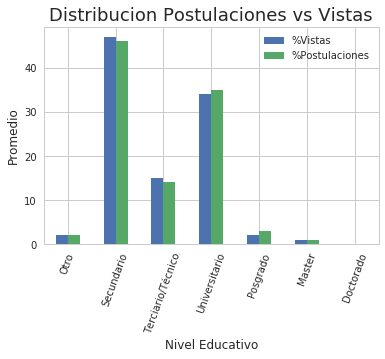

In [48]:
g = df_edu_vistas_post[["%Vistas","%Postulaciones"]].plot(kind="bar", rot= 70)
g.set_title("Distribucion Postulaciones vs Vistas", fontsize=18)
g.set_xlabel("Nivel Educativo", fontsize=12)
g.set_ylabel("Promedio", fontsize=12)

In [49]:
df_edu_vistas_post

,Vistas,Postulaciones,%Vistas,%Postulaciones,prioridad
nombre,,,,,
Otro,3828,6727,2.0,2.0,6
Secundario,108580,202671,47.0,46.0,5
Terciario/Técnico,34266,62005,15.0,14.0,4
Universitario,78699,152373,34.0,35.0,3
Posgrado,5007,11206,2.0,3.0,2
Master,2214,4930,1.0,1.0,1
Doctorado,138,334,0.0,0.0,0
